# This is a sample Jupyter Notebook



In [13]:
!python --version

Python 3.9.19


# Prepare the data

In [14]:
import pandas as pd
# Have a look at the data
df = pd.read_csv('data\Environment variables-data-as-seriestocolumns-2022-03-01 16_36_12.csv')
df.shape


(62724, 4)

In [15]:
df.head()

,Time,TF.insideEnvironment.insideHumidity,TF.insideEnvironment.insideLight,TF.insideEnvironment.insideTemperature
0,2022-02-28 06:00:01,29.0,0.14,25.0
1,2022-02-28 06:00:01,29.0,NaN,NaN
2,2022-02-28 06:00:05,29.0,NaN,NaN
3,2022-02-28 06:00:06,29.0,NaN,NaN
4,2022-02-28 06:00:11,29.0,NaN,NaN


In [16]:
# Indexing over timestamp
df['Time'] = pd.to_datetime(df['Time'])
# check if it worked
df.dtypes

Time                                      datetime64[ns]
TF.insideEnvironment.insideHumidity              float64
TF.insideEnvironment.insideLight                 float64
TF.insideEnvironment.insideTemperature           float64
dtype: object

In [17]:
#df.set_index('Time', inplace=True)

# The data looks like the three values of one timestamp are distributed over three different rows. Lets check if that is really the case. 

In [21]:
# get datapoints of the timestamp of the third entry
df[df['Time'] == df['Time'][2]]


,Time,TF.insideEnvironment.insideHumidity,TF.insideEnvironment.insideLight,TF.insideEnvironment.insideTemperature
2,2022-02-28 06:00:05,29.0,NaN,NaN


So it's not the case. Lets count the nan values in each column to get a better understanding of the data.

In [23]:
df.isna().sum()

Time                                          0
TF.insideEnvironment.insideHumidity       24632
TF.insideEnvironment.insideLight          51713
TF.insideEnvironment.insideTemperature    49097
dtype: int64

So we have a different amount of data points for each column. We will have to interpolate the data to get a consistent dataset.
But first lets rename the columns to make them more readable. And also get rid of duplicates.

In [24]:
#rename the columns
df.columns = ['Time', 'Humidity', 'Light', 'Temperature']
df.head()

,Time,Humidity,Light,Temperature
0,2022-02-28 06:00:01,29.0,0.14,25.0
1,2022-02-28 06:00:01,29.0,NaN,NaN
2,2022-02-28 06:00:05,29.0,NaN,NaN
3,2022-02-28 06:00:06,29.0,NaN,NaN
4,2022-02-28 06:00:11,29.0,NaN,NaN


In [54]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.head()

,Humidity,Light,Temperature
Time,,,
2022-02-28 06:00:01,29.0,0.14,25.0
2022-02-28 06:00:01,29.0,NaN,NaN
2022-02-28 10:34:10,28.0,NaN,NaN
2022-02-28 11:09:09,27.0,NaN,NaN
2022-02-28 11:37:42,26.0,NaN,NaN


In [55]:
# count duplicate indexes
df.index.duplicated().sum()

21

There are just 21 duplicate timestamps left. This number seems low enough to continue interpolation with the time method.

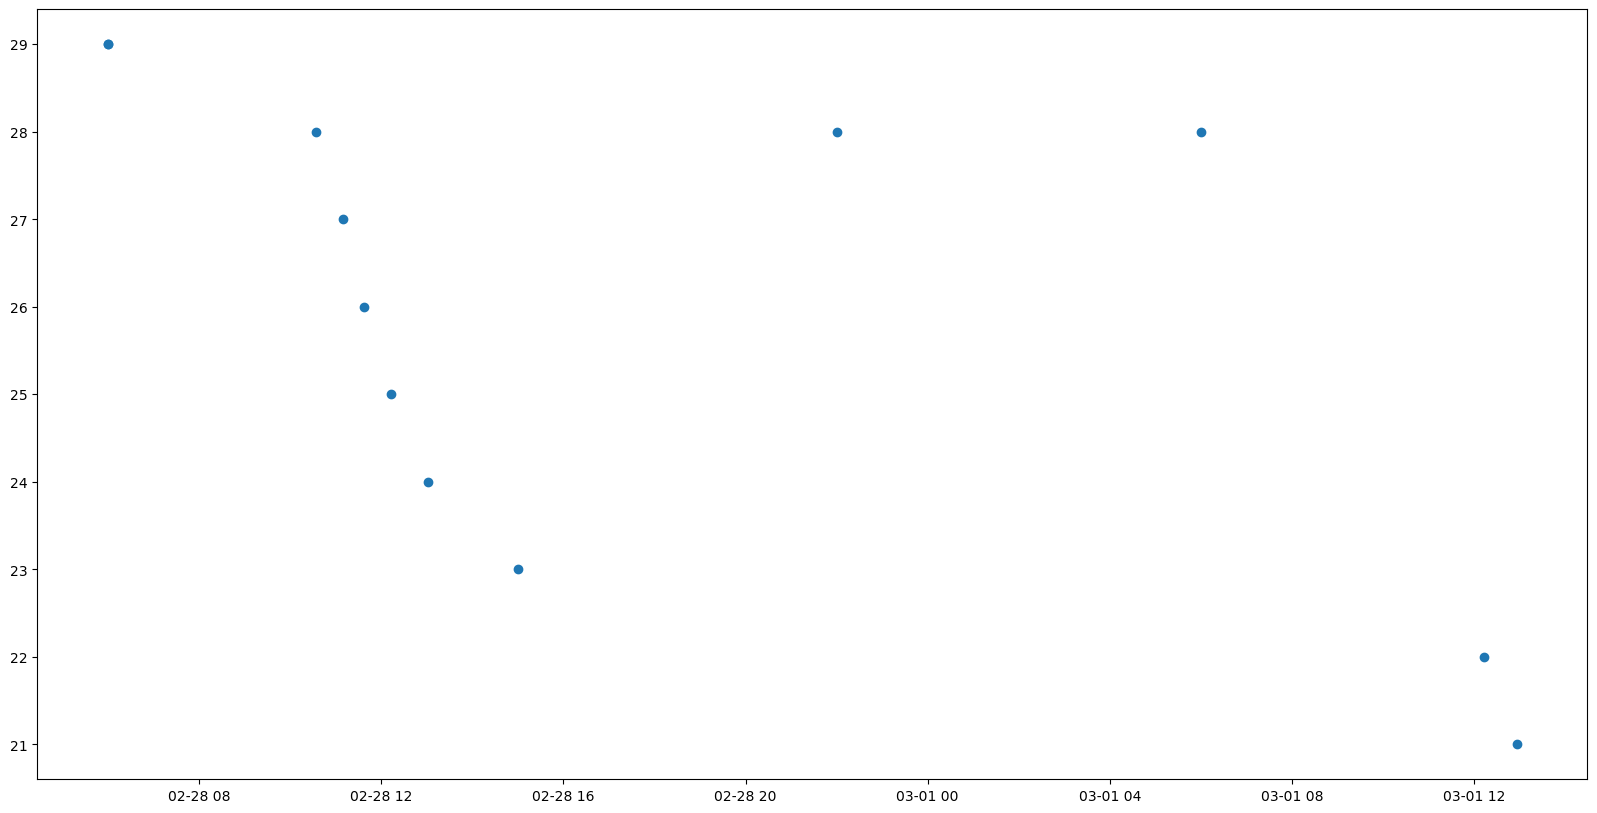

In [59]:
# import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df['Humidity'], marker='o', linestyle='')

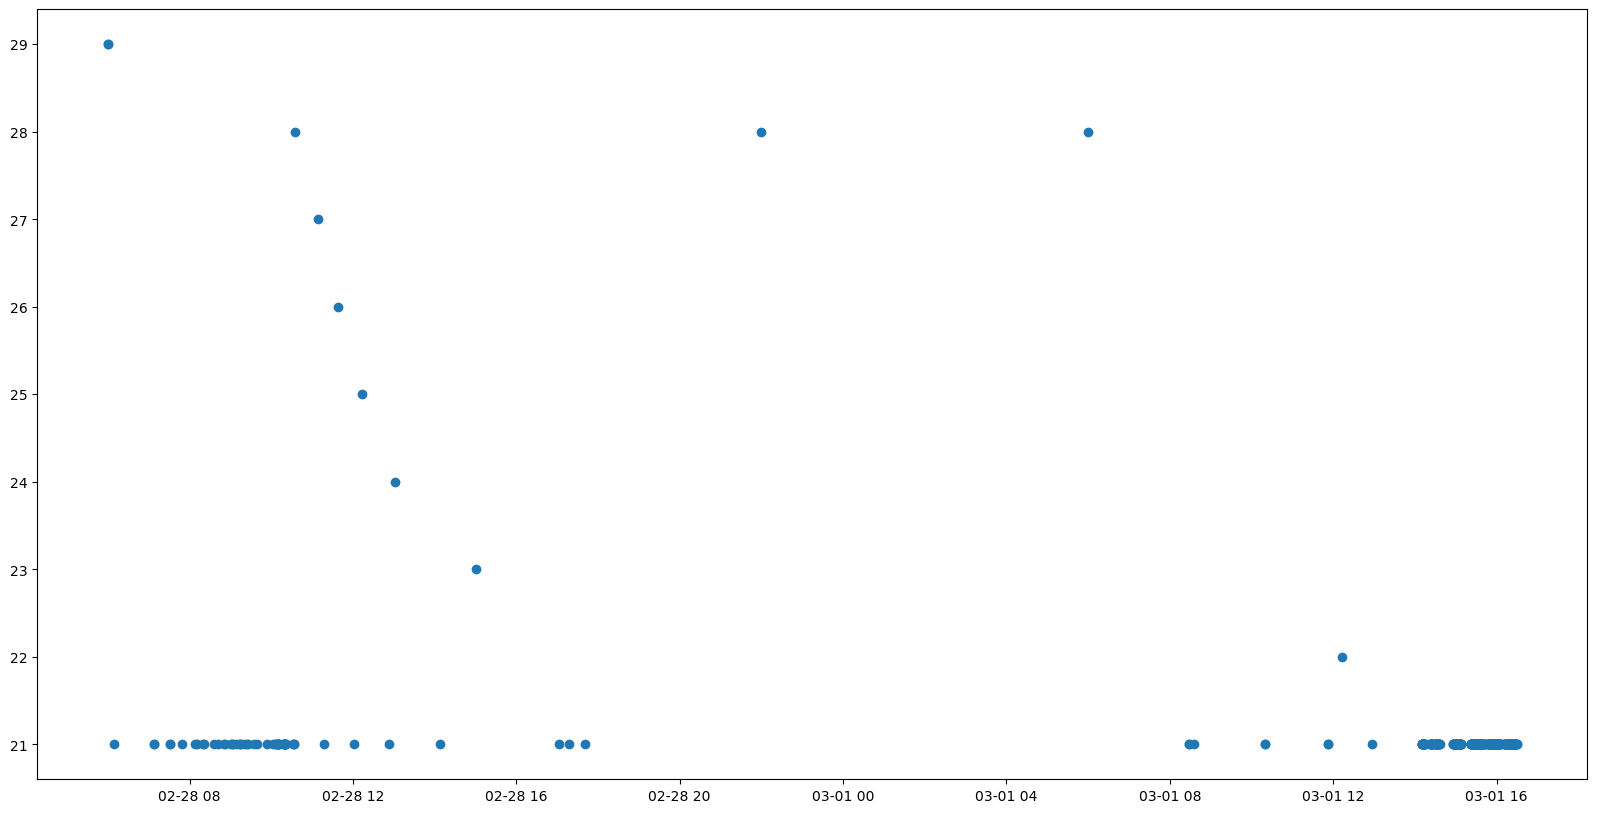

In [61]:
# interpolate the data
df_ip = df.copy()
df_ip.interpolate(method='linear', inplace=True)
plt.figure(figsize=(20,10))
plt.plot(df_ip['Humidity'], marker='o', linestyle='')
